In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import astropy.io.fits as fits
import os
from scipy.io.idl import readsav
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling import models, fitting
from craftroom import resample
from scipy.interpolate import interp1d
from astropy.convolution import convolve, Box1DKernel


%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

Trying out the cyberpunk matplotlib theme... https://github.com/dhaitz/mplcyberpunk

In [8]:
sed = Table.read('ad_leo_sed_v1.ecsv')
w, f, e, s = sed['WAVELENGTH'], sed['FLUX'], sed['ERROR'], sed['INSTRUMENT']

In [4]:
import mplcyberpunk
plt.style.use("cyberpunk")

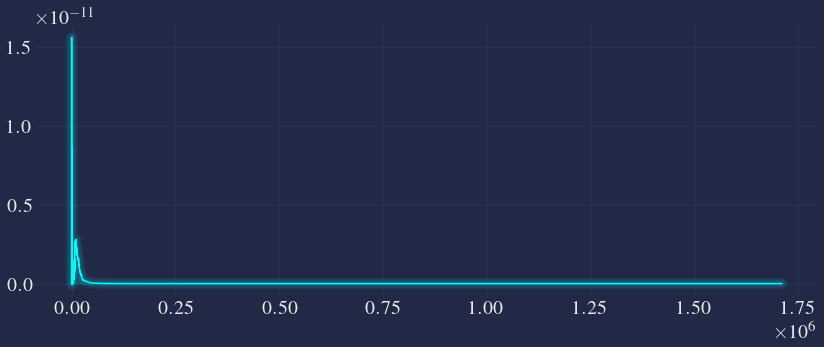

In [6]:
plt.plot(w,f)
mplcyberpunk.add_glow_effects()

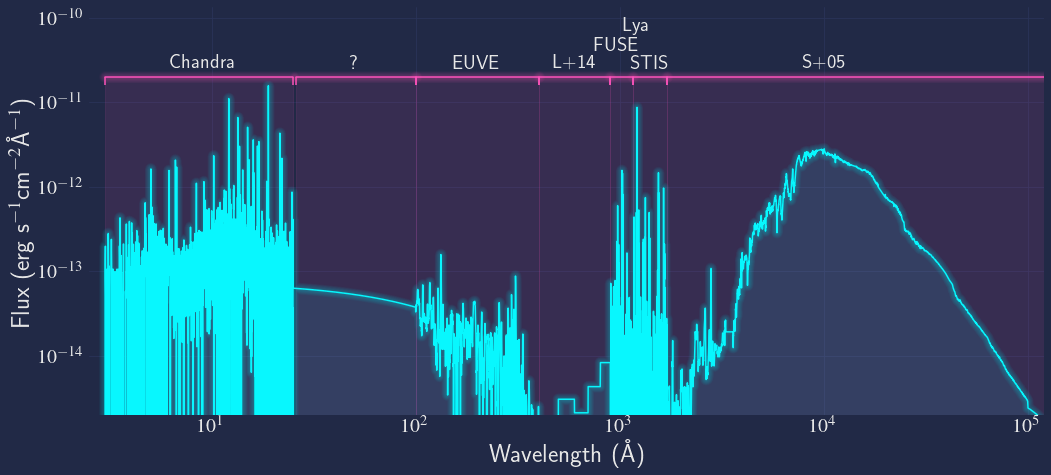

In [19]:
plt.figure(figsize=(15, 7))
plt.plot(w, f)
plt.xscale('log')
plt.yscale('log')
plt.ylim(2e-15)
plt.xlim(2.5, 1.2e5)

wfuse = w[s ==110]
w_stis = w[s==111]
w_o = w[s==1001]


labely = 2.5e-11
liney = 2e-11
ticklength = liney*0.2
plt.errorbar((3,25),(liney, liney), yerr= [[ticklength,ticklength],[0,0]], c ='C1')
plt.annotate('Chandra', (9, labely), horizontalalignment='center')

plt.errorbar((26,100),(liney, liney), yerr= [[ticklength,ticklength],[0,0]], c ='C1')
plt.annotate('?', (50, labely), horizontalalignment='center')


plt.errorbar((100,400),(liney, liney), yerr= [[ticklength,ticklength],[0,0]], c ='C1')
plt.annotate('EUVE', (200, labely), horizontalalignment='center')

plt.errorbar((400,wfuse[0]),(liney, liney), yerr= [[ticklength,ticklength],[0,0]], c ='C1')
plt.annotate('L+14', (600, labely), horizontalalignment='center')

plt.errorbar((wfuse[0], wfuse[-1]),(liney, liney), yerr= [[ticklength,ticklength],[0,0]], c ='C1')
plt.annotate('FUSE', (970, 4e-11), horizontalalignment='center')

plt.errorbar((w_stis[0],w_stis[-1]),(liney, liney), yerr= [[ticklength,ticklength],[0,0]], c ='C1')
plt.annotate('STIS', (1400, labely), horizontalalignment='center')

plt.annotate('Lya', (1215, 7e-11), horizontalalignment='center')

plt.errorbar((w_o[0],w_o[-1]),(liney, liney), yerr= [[ticklength,ticklength],[0,0]], c ='C1')
plt.annotate('S+05', (10000, labely), horizontalalignment='center')

plt.ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)
plt.xlabel('Wavelength (\AA)', size=25)
mplcyberpunk.add_glow_effects()

plt.tight_layout()
plt.savefig('ad_leo_cp_v1.pdf')
plt.savefig('ad_leo_cp_v1.png')

Well that's cool.